# Heart Disease UCI

This is a model that predicts the heart disease status of a patient according to patient's data. This database contains 76 attributes, but all published experiments refer to using a subset of 14 of them. In particular, the Cleveland database is the only one that has been used by ML researchers to this date. The "goal" field refers to the presence of heart disease in the patient. It is integer valued from 0 (no presence) to 4. 

The other columns are:
> -age

> -sex

> -chest pain type (4 values)

> -resting blood pressure

> -serum cholestoral in mg/dl

> -fasting blood sugar > 120 mg/dl

> -resting electrocardiographic results (values 0,1,2)

> -maximum heart rate achieved

> -exercise induced angina

> -oldpeak = ST depression induced by exercise relative to rest

> -the slope of the peak exercise ST segment

> -number of major vessels (0-3) colored by flourosopy

> -thal: 3 = normal; 6 = fixed defect; 7 = reversable defect

The names and social security numbers of the patients were recently removed from the database, replaced with dummy values. One file has been "processed", that one containing the Cleveland database. All four unprocessed files also exist in this directory.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv(r'C:\Users\Asus\Desktop\Heart Disease Prediction\heart.csv')

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


# Data Visualisation and Inspection

In this part, the data is visualized and inspected. SOne outcomes may be helpful from this part in order to use the dataset. 

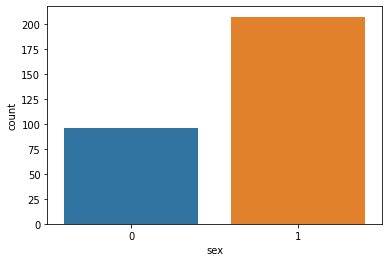

In [4]:
sns.countplot(x='sex', data=df)
plt.xlabel('sex')
plt.show()

The number of male participants is bigger than female participants. This means using this dataset for male participants will give better results. 

In [4]:
countFemale = len(df[df.sex==0])
countMale = len(df[df.sex ==1])
print("Percentage of Female Patients: {:.2f}%".format((countFemale / (len(df.sex))*100)))
print("Percentage of Male Patients: {:.2f}%".format((countMale / (len(df.sex))*100)))


Percentage of Female Patients: 31.68%
Percentage of Male Patients: 68.32%


Let's check the ag distribution by grouping the data in terms of target. 

In [5]:
df.groupby('target').mean()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
target,,,,,,,,,,,,,
0,56.601449,0.826087,0.478261,134.398551,251.086957,0.159420,0.449275,139.101449,0.550725,1.585507,1.166667,1.166667,2.543478
1,52.496970,0.563636,1.375758,129.303030,242.230303,0.139394,0.593939,158.466667,0.139394,0.583030,1.593939,0.363636,2.121212


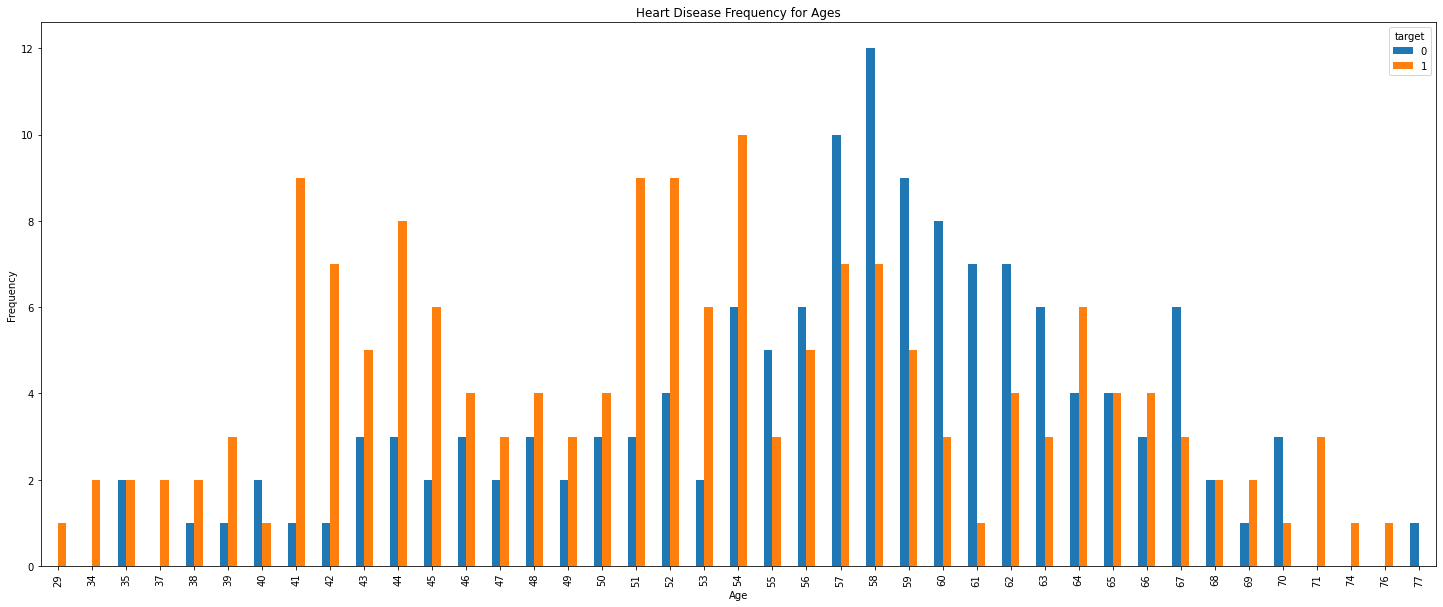

In [7]:
pd.crosstab(df.age,df.target).plot(kind="bar",figsize=(25,10))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

0 means female and 1 means male participant. 

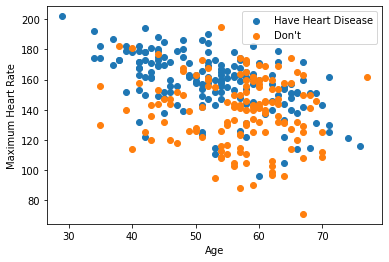

In [10]:
plt.scatter(x=df.age[df.target==1], y=df.thalach[(df.target==1)])
plt.scatter(x=df.age[df.target==0], y=df.thalach[(df.target==0)])
plt.legend(["Have Heart Disease", "Don't"])
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate")
plt.show()

Maximum heart rate can be a clue in order to predict wheter the participant has a heart disease or not because as seen in the graph above, the ones with heart disease have a tendency to have higher maximum heart rate values. 

Moreover, fasting blood sugar status may be a clue. Let's look at the graph below. 

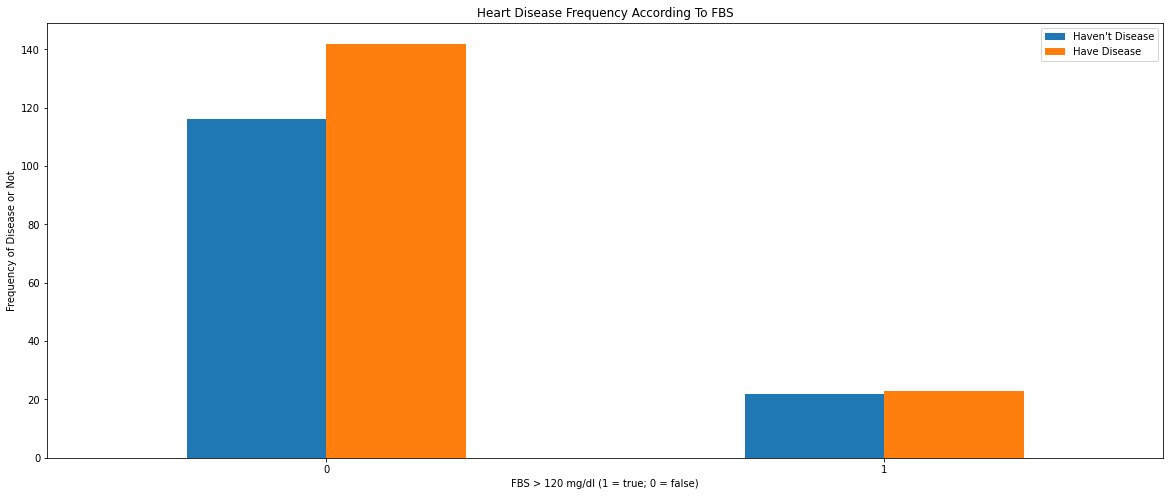

In [13]:
pd.crosstab(df.fbs,df.target).plot(kind="bar",figsize=(20,8))
plt.title('Heart Disease Frequency According To FBS')
plt.xlabel('FBS > 120 mg/dl (1 = true; 0 = false)')
plt.xticks(rotation = 0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency of Disease or Not')
plt.show()

The graph tells us that FBS is not so improtant in this dataset. 

Chest pain is a symptom which is robust and has a meaning for the doctors. Let's comapre the types of chest pains. 

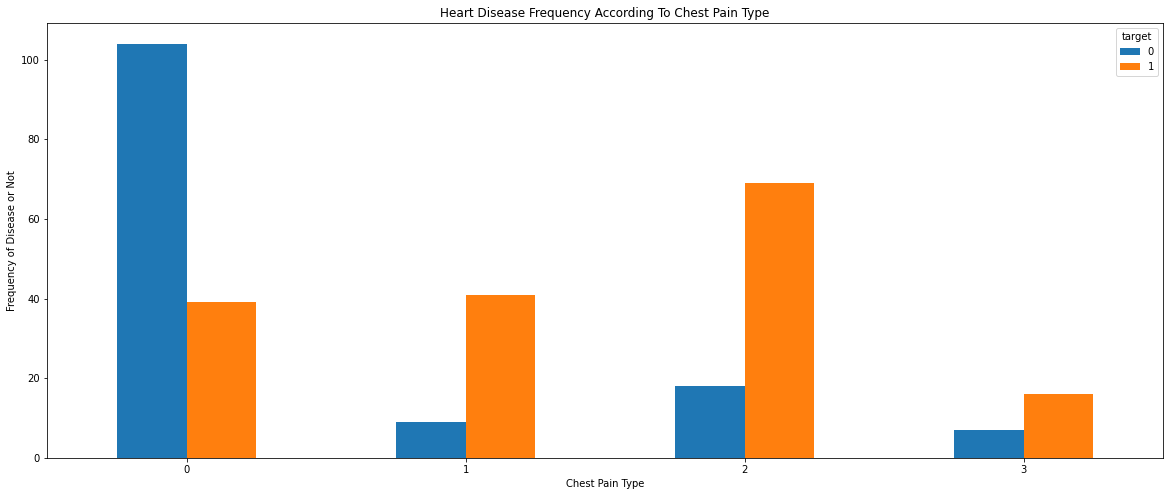

In [14]:
pd.crosstab(df.cp,df.target).plot(kind="bar",figsize=(20,8))
plt.title('Heart Disease Frequency According To Chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.xticks(rotation = 0)
plt.ylabel('Frequency of Disease or Not')
plt.show()

We inspected the data and have some idea about what is giong on between the columns. Now, let's process the data. 

# Creating Dummy Variables

The columns cp, thal and slope can be encoded by one hot encoding since they have low number of varaiations. In the lines below, one hot encoding is applied to thse columns. 

In [15]:
a = pd.get_dummies(df['cp'], prefix = "cp")
b = pd.get_dummies(df['thal'], prefix = "thal")
c = pd.get_dummies(df['slope'], prefix = "slope")

In [16]:
frames = [df, a, b, c]
df = pd.concat(frames, axis = 1)
df.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
0,63,1,3,145,233,1,0,150,0,2.3,...,0,0,1,0,1,0,0,1,0,0
1,37,1,2,130,250,0,1,187,0,3.5,...,0,1,0,0,0,1,0,1,0,0
2,41,0,1,130,204,0,0,172,0,1.4,...,1,0,0,0,0,1,0,0,0,1
3,56,1,1,120,236,0,1,178,0,0.8,...,1,0,0,0,0,1,0,0,0,1
4,57,0,0,120,354,0,1,163,1,0.6,...,0,0,0,0,0,1,0,0,0,1


In [17]:
df = df.drop(columns = ['cp', 'thal', 'slope'])
df.head()

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,...,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
0,63,1,145,233,1,0,150,0,2.3,0,...,0,0,1,0,1,0,0,1,0,0
1,37,1,130,250,0,1,187,0,3.5,0,...,0,1,0,0,0,1,0,1,0,0
2,41,0,130,204,0,0,172,0,1.4,0,...,1,0,0,0,0,1,0,0,0,1
3,56,1,120,236,0,1,178,0,0.8,0,...,1,0,0,0,0,1,0,0,0,1
4,57,0,120,354,0,1,163,1,0.6,0,...,0,0,0,0,0,1,0,0,0,1


# Model for Logistic Regression

In the lines below, a model is built for logistic regression. 

In [25]:
y = df.target.values
x_data = df.drop(['target'], axis=1)

The data is normalized manually as below. 

In [26]:
x = (x_data - np.min(x_data))/(np.max(x_data)-np.min(x_data)).values

The train and test sets are divided.

In [27]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In the lines below, the initialization, sigmoid function forward propagations and backward propagations are implemented. They can also be used fron the open source libraries like sklearn, tensorflow etc. 

In [28]:
x_train = x_train.T
y_train = y_train.T
x_test = x_test.T
y_test = y_test.T

In [29]:
def initialize(dimension):

    weight = np.full((dimension, 1), 0.01)
    bias = 0.01
    return weight, bias

In [30]:
def sigmoid(z):

    y_head = 1/(1+np.exp(-z))
    return y_head

In [31]:
def forwardBackward(weight,bias,x_train,y_train):
    # Forward
    
    y_head = sigmoid(np.dot(weight.T,x_train) + bias)
    loss = -(y_train*np.log(y_head) + (1-y_train)*np.log(1-y_head))
    cost = np.sum(loss) / x_train.shape[1]
    
    # Backward
    derivative_weight = np.dot(x_train,((y_head-y_train).T))/x_train.shape[1]
    derivative_bias = np.sum(y_head-y_train)/x_train.shape[1]
    gradients = {"Derivative Weight" : derivative_weight, "Derivative Bias" : derivative_bias}
    
    return cost,gradients

In [32]:
def update(weight,bias,x_train,y_train,learningRate,iteration) :
    costList = []
    index = []
    
    #for each iteration, update weight and bias values
    for i in range(iteration):
        cost,gradients = forwardBackward(weight,bias,x_train,y_train)
        weight = weight - learningRate * gradients["Derivative Weight"]
        bias = bias - learningRate * gradients["Derivative Bias"]
        
        costList.append(cost)
        index.append(i)

    parameters = {"weight": weight,"bias": bias}
    
    print("iteration:",iteration)
    print("cost:",cost)
    plt.plot(index,costList)
    plt.xlabel("Number of Iteration")
    plt.ylabel("Cost")
    plt.show()

    return parameters, gradients

In [33]:
def predict(weight,bias,x_test):
    z = np.dot(weight.T,x_test) + bias
    y_head = sigmoid(z)

    y_prediction = np.zeros((1,x_test.shape[1]))
    
    for i in range(y_head.shape[1]):
        if y_head[0,i] <= 0.5:
            y_prediction[0,i] = 0
        else:
            y_prediction[0,i] = 1
    return y_prediction

In [34]:
def logistic_regression(x_train,y_train,x_test,y_test,learningRate,iteration):
    dimension = x_train.shape[0]
    weight,bias = initialize(dimension)
    
    parameters, gradients = update(weight,bias,x_train,y_train,learningRate,iteration)

    y_prediction = predict(parameters["weight"],parameters["bias"],x_test)
    
    print("Manuel Test Accuracy: {:.2f}%".format((100 - np.mean(np.abs(y_prediction - y_test))*100)))

iteration: 110
cost: 0.3575352682787755


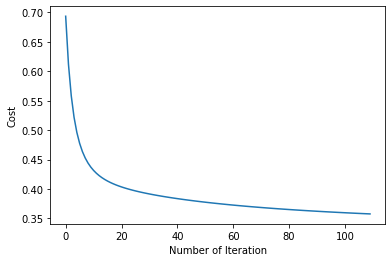

Manuel Test Accuracy: 86.89%


In [35]:
logistic_regression(x_train,y_train,x_test,y_test,1,110)

In [36]:
accuracies = {}

lr = LogisticRegression()
lr.fit(x_train.T,y_train.T)
acc = lr.score(x_test.T,y_test.T)*100

accuracies['Logistic Regression'] = acc
print("Test Accuracy {:.2f}%".format(acc))

Test Accuracy 86.89%


The manuel test accuracy is shown above. After that part, we will go with sklearn's modules. 

# Other Models 

### KNN

In [37]:
# KNN Model
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 2)  # n_neighbors means k
knn.fit(x_train.T, y_train.T)
prediction = knn.predict(x_test.T)

print("{} NN Score: {:.2f}%".format(2, knn.score(x_test.T, y_test.T)*100))

2 NN Score: 77.05%


In order to find the best k value, a small impementation is done as such.

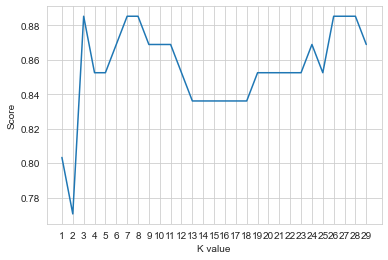

Maximum KNN Score is 88.52%


In [57]:
# try ro find best k value
scoreList = []
for i in range(1,30):
    knn_best = KNeighborsClassifier(n_neighbors = i)  # n_neighbors means k
    knn_best.fit(x_train.T, y_train.T)
    scoreList.append(knn_best.score(x_test.T, y_test.T))
    
plt.plot(range(1,30), scoreList)
plt.xticks(np.arange(1,30,1))
plt.xlabel("K value")
plt.ylabel("Score")
plt.show()

acc = max(scoreList)*100
accuracies['KNN'] = acc
print("Maximum KNN Score is {:.2f}%".format(acc))

Best ones worked is k = 4, 8 and 9. The rest also have k values with equal scores but more neighbors may lead to overfitting. 

### SVM

In [45]:
from sklearn.svm import SVC

In [46]:
svm = SVC(random_state = 1)
svm.fit(x_train.T, y_train.T)

acc = svm.score(x_test.T, y_test.T)*100
accuracies['SVM'] = acc
print(acc)

88.52459016393442


### Gaussian NB

In [47]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train.T, y_train.T)

acc = nb.score(x_test.T,y_test.T)*100
accuracies['Naive Bayes'] = acc
print("Accuracy of Naive Bayes: {:.2f}%".format(acc))

Accuracy of Naive Bayes: 86.89%


### Decision Tree Classifier

In [48]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(x_train.T, y_train.T)

acc = dtc.score(x_test.T, y_test.T)*100
accuracies['Decision Tree'] = acc
print("Decision Tree Test Accuracy {:.2f}%".format(acc))

Decision Tree Test Accuracy 78.69%


### Random Forest Classifier

In [49]:
# Random Forest Classification
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 1000, random_state = 1)
rf.fit(x_train.T, y_train.T)

acc = rf.score(x_test.T,y_test.T)*100
accuracies['Random Forest'] = acc
print("Random Forest Algorithm Accuracy Score : {:.2f}%".format(acc))

Random Forest Algorithm Accuracy Score : 88.52%


### XGBoost Classifier

In [50]:
# XGBoost Classification
from xgboost import XGBClassifier
xgb = XGBClassifier(use_label_encoder=False)
xgb.fit(x_train.T, y_train.T)

acc = xgb.score(x_test.T,y_test.T)*100
accuracies['XGB'] = acc
print("XGBoost Accuracy Score : {:.2f}%".format(acc))

[13:54:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBoost Accuracy Score : 85.25%


# Comparison

The 7 clasifier algorithms are compared in the graph below. Best performance is obtained from Random Forest but SVM and KNN also performed good. 

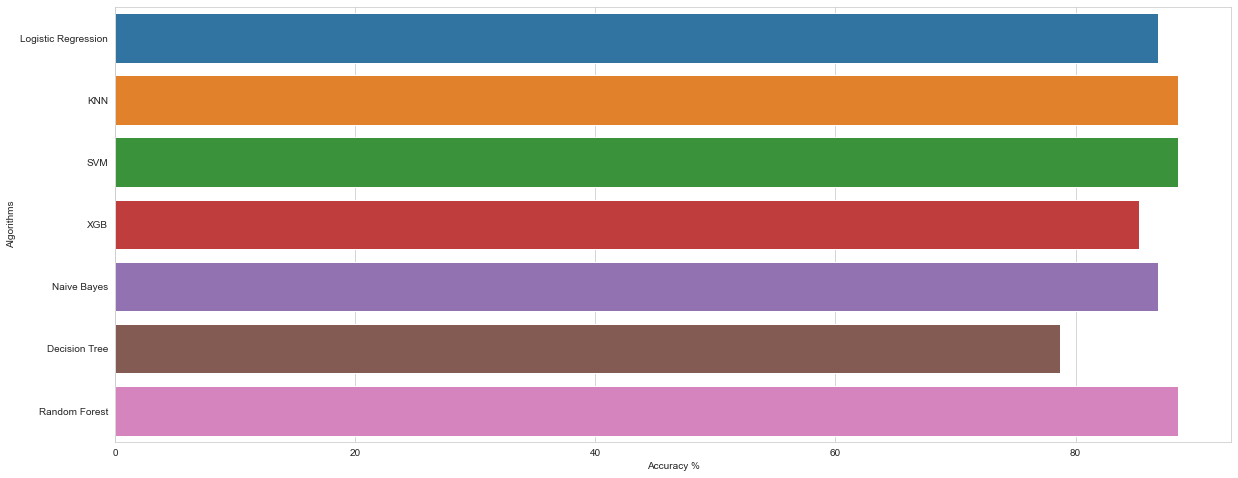

In [56]:

plt.figure(figsize=(20,8))
plt.yticks(np.arange(0,100,10))
plt.xlabel("Accuracy %")
plt.ylabel("Algorithms")
sns.barplot(x=list(accuracies.values()), y=list(accuracies.keys()))
plt.show()